<a href="https://colab.research.google.com/github/pili-zhangqiu/ML-Summer-School/blob/master/AICore_SC_Lesson06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Getting Started**
**Mounting your GDrive**

By mounting the Drive to your Python notebook, you will be able to read and manipulate files stored in your Google *Drive*.

In [1]:
# Import the function to mount the Drive
from google.colab import drive

# This line shows that we will be mounting everything stored in the main GDrive folder
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# **Tips for Regression Models**
**Opening the data file**

In [2]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Use pandas to read the csv
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/BikeSharingDaily.csv')

# Preview of the dataset
print(df.head(10))
print(df.columns)

   instant      dteday  season  yr  ...  casual  registered   cnt  numpigeons
0        1  2011-01-01       1   0  ...     331         654   985        1547
1        2  2011-01-02       1   0  ...     131         670   801        1004
2        3  2011-01-03       1   0  ...     120        1229  1349         709
3        4  2011-01-04       1   0  ...     108        1454  1562        1016
4        5  2011-01-05       1   0  ...      82        1518  1600        1185
5        6  2011-01-06       1   0  ...      88        1518  1606         647
6        7  2011-01-07       1   0  ...     148        1362  1510         882
7        8  2011-01-08       1   0  ...      68         891   959        1217
8        9  2011-01-09       1   0  ...      54         768   822        1070
9       10  2011-01-10       1   0  ...      41        1280  1321         528

[10 rows x 17 columns]
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', '

**Feature Scaling**

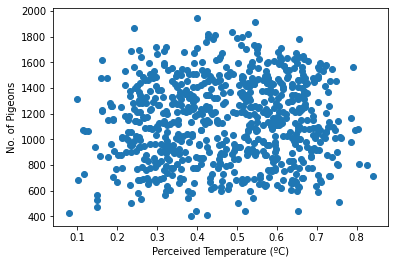

In [6]:
# Define the features that will be used in the prediction
features = [df['hum'],df['atemp'],df['windspeed']]

# Define the independent and dependent variables
x = np.stack(features, axis=1)
y = np.array(df['numpigeons'])    # In this case we are going to try to predict the number of pigeons with the humidity, perceived temp and windspeed
                                  # However, when you plot the data you will see that there isn't a clear pattern. It won't be a good model, but let's try it anyways

# Plot data without normalising it
print()
plt.scatter(df['atemp'], df['numpigeons'])
plt.xlabel('Perceived Temperature (ºC)')
plt.ylabel('No. of Pigeons')
plt.show()

In [10]:
# y = m1*x1 + m2*x2 + .... + mn*xn

# Normalisation function for multifeature models (x1, x2, x3....xn)
def normalize(x):
  xnorm = np.copy(x)
  for i in range (x.shape[1]):        # For loop to run and normalize each of the features input (because I can only do one at a time)
    current_col = x[:,i]
    my_mean = np.mean(current_col)
    my_std = np.std(current_col)
    xnorm[:,i] = (current_col-my_mean)/my_std   # Equation for normalization is this line
  return xnorm

# Normalisation for the prediction (y)
y_mean = np.mean(y)
y_std = np.std(y)

y_norm = (y-y_mean)/y_std

# **Optimising Our Regression Model**
In this example we will be automatize the process in the section above, by allocating random combinations of values to 'm' and 'b'. Random Search will be used as our optimiser in order to increase our chances of finding the linear function that allows for the minimum cost.

In [11]:
# Calculate your mean squared error (MSE) or cost
# MSE =  1/n * sum_from_0_to_n( (y_i-y_pred_i)^2 )
def mse_cost(y,y_pred):
  diffs = y-y_pred
  squared_diffs = np.square(diffs)
  mean_squared_diffs = np.mean(squared_diffs)
  return mean_squared_diffs

In [12]:
# My regression eq: y = m1*x1 + m2*x2 + ....+ mn*xn + b

# Create the random search function
def random_search(n_iterations, x_norm, y_norm):
  lowest_cost = float("inf")  # lowest cost thus far

  for i in range(n_iterations):
    m = np.random.randn(len(features))
    b = np.random.randn()

    # Create prediction with current combination of values
    y_pred = np.zeros(len(y_norm))
    for i in range(len(features)):
      y_pred += x_norm[:,i] * m[i]    # i+=1 is  the same as saying   i= i+1
    y_pred += b

    cost = mse_cost(y_norm,y_pred)
    if cost < lowest_cost:  # Make sure to store all the best current combination of values
      best_m = m
      best_b = b
      lowerst_cost = cost
  return best_m, best_b, lowest_cost

found parameters: m =  [ 0.24765812 -1.51857218  0.63788703]   b =  1.7623371356294024


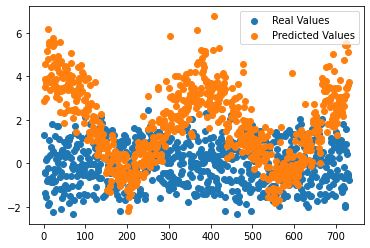

cost is  716677.2588916806


In [14]:
# Let's see how my algorithm performs when predicted data that is not that related
# Run normalization function
x_norm = normalize(x)

y_mean = np.mean(y)
y_std = np.std(y)
y_norm = (y-y_mean)/y_std

# Run the random search function, but using the normalized data
m, b, cost = random_search(100000, x_norm, y_norm)

# Get our prediction function: y = m_1*x_1 + m_2*x_2 + m_3*x_3 ... + b
y_pred = np.zeros(len(y))
for i in range(len(features)):
  y_pred += x_norm[:,i] * m[i]    # i+=1 is  the same as saying   i= i+1
y_pred += b

# Plot scatter plot
print('found parameters: m = ',m,'  b = ',b)
plt.scatter(df['instant'],y_norm, label = 'Real Values')
plt.scatter(df['instant'],y_pred, label = 'Predicted Values')
plt.legend()
plt.show()

# Plot cost
y_pred = (y_pred*y_std) + y_mean
cost = mse_cost(y, y_pred)
print('cost is ', cost)

# In this case we see that the numpigeons is not a good parameter to try to predict using the existing data

found parameters: m =  [0.68510192 1.22615356 0.55666456]   b =  -0.29460072224092587


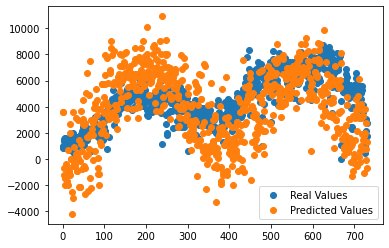

cost is  7555002.115449394


In [21]:
# But if we try to predict 'cnt', which we know is dependent on the existing features, then the model will find a great pattern of behaviour
# With the same features, change the predicted variable to 'cnt'
y = np.array(df['cnt']) 

# Run normalization function
x_norm = normalize(x)

y_mean = np.mean(y)
y_std = np.std(y)
y_norm = (y-y_mean)/y_std

# Run the random search function, but using the normalized data
m, b, cost = random_search(100000, x_norm, y_norm)

# Get our prediction function: y = m_1*x_1 + m_2*x_2 + m_3*x_3 ... + b
y_pred = np.zeros(len(y))
for i in range(len(features)):
  y_pred += x_norm[:,i] * m[i]    # i+=1 is  the same as saying   i= i+1
y_pred += b

y_pred = (y_pred*y_std) + y_mean  # Denormalise

# Plot scatter plot
print('found parameters: m = ',m,'  b = ',b)
plt.scatter(df['instant'],y, label = 'Real Values')
plt.scatter(df['instant'],y_pred, label = 'Predicted Values')
plt.legend()
plt.show()

# Plot cost
cost = mse_cost(y, y_pred)
print('cost is ', cost)

# **Example with Wine Quality Dataset**

In [24]:
# Use pandas to read the csv
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/winequality-white.csv')

# Preview of the dataset
print(df.head())
print(df.columns)


   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9        6

[5 rows x 12 columns]
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
0        8.8
1        9.5
2       10.1
3        9.9
4        9.9
        ... 
4893    11.2
4894     9.6
4895     9.4
4896    12.8
4897    11.8
Name: alcohol, Length: 4898, dtype: float64


found parameters: m =  [ 0.17264708 -0.24801452  0.2765594   0.21404072 -0.22713631 -0.15775915
  0.14320235  0.75643716 -0.42749782]   b =  -1.2718698353848026


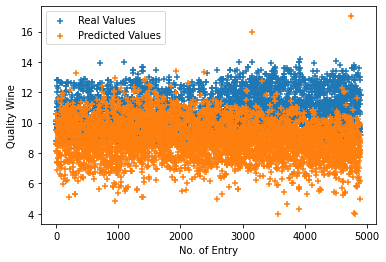

cost is  6.358590306143545


In [28]:
# Define the features that will be used in the prediction
# features = [df['fixed acidity'],df['volatile acidity'], df['citric acid'],df['residual sugar'],df['density'],df['chlorides'],df['free sulfur dioxide'],df['total sulfur dioxide'],df['pH'],df['sulphates'],df['alcohol']]
features = [df['fixed acidity'],df['volatile acidity'], df['citric acid'],df['residual sugar'],df['density'],df['chlorides'],df['free sulfur dioxide'],df['total sulfur dioxide'],df['sulphates']]


# Define the independent and dependent variables. We are predicting the alcohol quality
x = np.stack(features, axis=1)
y = np.array(df['alcohol'])

# Run normalization function
x_norm = normalize(x)

y_mean = np.mean(y)
y_std = np.std(y)
y_norm = (y-y_mean)/y_std

# Run the random search function, but using the normalized data
m, b, cost = random_search(100000, x_norm, y_norm)

# Get our prediction function: y = m_1*x_1 + m_2*x_2 + m_3*x_3 ... + b
y_pred = np.zeros(len(y))
for i in range(len(features)):
  y_pred += x_norm[:,i] * m[i]    # i+=1 is  the same as saying   i= i+1
y_pred += b

y_pred = (y_pred*y_std) + y_mean  # Denormalise

# Create a instance counter
instant = range(0,4898)

# Plot scatter plot
print('found parameters: m = ',m,'  b = ',b)
plt.scatter(instant,y, label = 'Real Values', marker='+')
plt.scatter(instant,y_pred, label = 'Predicted Values', marker='+')
plt.xlabel('No. of Entry')
plt.ylabel('Quality Wine')
plt.legend()
plt.show()

# Plot cost
cost = mse_cost(y, y_pred)
print('cost is ', cost)